# Research question 3 - topic detection preprocessing 

Topic needs to be detected for each sentence. Due to that sentences are short I will use short text topic modeling  algorithm GSDMM (Gibbs Sampling Dirichlet Multinomial Mixture) which is similar to LDA (Latent Dirichlet Allocation) but detect only one topic per sentence.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Review-word-count-analysis" data-toc-modified-id="Review-word-count-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Review word count analysis</a></span><ul class="toc-item"><li><span><a href="#Plot-distribution-of-reviews-word-count" data-toc-modified-id="Plot-distribution-of-reviews-word-count-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot distribution of reviews word count</a></span></li><li><span><a href="#Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'" data-toc-modified-id="Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long'</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-year" data-toc-modified-id="Plot-mean-review-word-count-by-year-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot mean review word count by year</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-city" data-toc-modified-id="Plot-mean-review-word-count-by-city-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot mean review word count by city</a></span></li><li><span><a href="#Plot-mean-review-count-by-year-and-city" data-toc-modified-id="Plot-mean-review-count-by-year-and-city-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot mean review count by year and city</a></span></li></ul></li><li><span><a href="#Sample-the-data-set" data-toc-modified-id="Sample-the-data-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample the data set</a></span></li><li><span><a href="#Review-preprocessing-by-sentences" data-toc-modified-id="Review-preprocessing-by-sentences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Review preprocessing by sentences</a></span><ul class="toc-item"><li><span><a href="#Extract-reviews" data-toc-modified-id="Extract-reviews-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extract reviews</a></span></li><li><span><a href="#Plot-most-frequent-words-before-preprocessing" data-toc-modified-id="Plot-most-frequent-words-before-preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot most frequent words before preprocessing</a></span></li><li><span><a href="#Tokenize,-lowercase-and-remove-punctuation" data-toc-modified-id="Tokenize,-lowercase-and-remove-punctuation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenize, lowercase and remove punctuation</a></span></li><li><span><a href="#Create-bigram-and-trigram-models" data-toc-modified-id="Create-bigram-and-trigram-models-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Create bigram and trigram models</a></span></li><li><span><a href="#Remove-stop-words" data-toc-modified-id="Remove-stop-words-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Remove stop words</a></span></li><li><span><a href="#Make-bigrams-and-trigrams" data-toc-modified-id="Make-bigrams-and-trigrams-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Make bigrams and trigrams</a></span></li><li><span><a href="#Lemmatize" data-toc-modified-id="Lemmatize-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Lemmatize</a></span></li><li><span><a href="#Plot-most-frequent-words-after-preprocessing" data-toc-modified-id="Plot-most-frequent-words-after-preprocessing-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Plot most frequent words after preprocessing</a></span></li><li><span><a href="#Plot-wordcloud-of-most-frequent-words" data-toc-modified-id="Plot-wordcloud-of-most-frequent-words-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Plot wordcloud of most frequent words</a></span></li></ul></li></ul></div>

### Setup

#### Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
from pprint import pprint

# Gensim
import gensim
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/natalia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Styles

In [3]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

#### Read data

In [4]:
def read_data():
    western_df = pd.read_pickle('western_df_sentiment.pkl')
    non_western_df = pd.read_pickle('non_western_df_sentiment.pkl')
    western_df['type'] = 'Western'
    non_western_df['type'] = 'Non-Western'
    return pd.concat([western_df, non_western_df]).reset_index(drop=True)

In [5]:
data = read_data()
print(data.shape)
data.head()

(3557399, 26)


id        date                                           comments  \
0  13913  2010-08-18  My girlfriend and I hadn't known Alina before ...   
1  13913  2011-07-11  Alina was a really good host. The flat is clea...   
2  13913  2011-09-13  Alina is an amazing host. She made me feel rig...   
3  13913  2011-10-03  Alina's place is so nice, the room is big and ...   
4  13913  2011-10-09  Nice location in Islington area, good for shor...   

   host_id neighbourhood_cleansed    city  latitude  longitude  \
0    54730              Islington  London  51.56802   -0.11121   
1    54730              Islington  London  51.56802   -0.11121   
2    54730              Islington  London  51.56802   -0.11121   
3    54730              Islington  London  51.56802   -0.11121   
4    54730              Islington  London  51.56802   -0.11121   

   number_of_reviews first_review  ...  \
0                 21   2010-08-18  ...   
1                 21   2010-08-18  ...   
2                 21   2010-08-18  ...   
3                 21   2010-08-18  ...   
4                 21   2010-08-18  ...   

                                   comments_expanded  \
0  My girlfriend and I had not known Alina before...   
1  Alina was a really good host. The flat is clea...   
2  Alina is an amazing host. She made me feel rig...   
3  Alina's place is so nice, the room is big and ...   
4  Nice location in Islington area, good for shor...   

                                    comments_cleaned review_word_count  year  \
0  My girlfriend and I had not known Alina before...               152  2010   
1  Alina was a really good host. The flat is clea...                31  2011   
2  Alina is an amazing host. She made me feel rig...                70  2011   
3  Alina s place is so nice the room is big and c...                87  2011   
4  Nice location in Islington area good for short...                17  2011   

   sentiment_from_rating sentiment_reviews sentiment_reviews_textblob  \
0                    pos                 1                          1   
1                    pos                 1                          1   
2                    pos                 1                          1   
3                    pos                 1                          1   
4                    pos                 1                          1   

                               comments_to_sentences  \
0  [My girlfriend and I had not known Alina befor...   
1  [Alina was a really good host., The flat is cl...   
2  [Alina is an amazing host., She made me feel r...   
3  [Alina s place is so nice the room is big and ...   
4  [Nice location in Islington area good for shor...   

              sentiment_sentences     type  
0  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1]  Western  
1                       [0, 0, 0]  Western  
2           [1, 0, 1, 1, 0, 0, 1]  Western  
3                    [1, 1, 0, 1]  Western  
4                          [1, 1]  Western  

[5 rows x 26 columns]

### Review word count analysis

#### Plot distribution of reviews word count

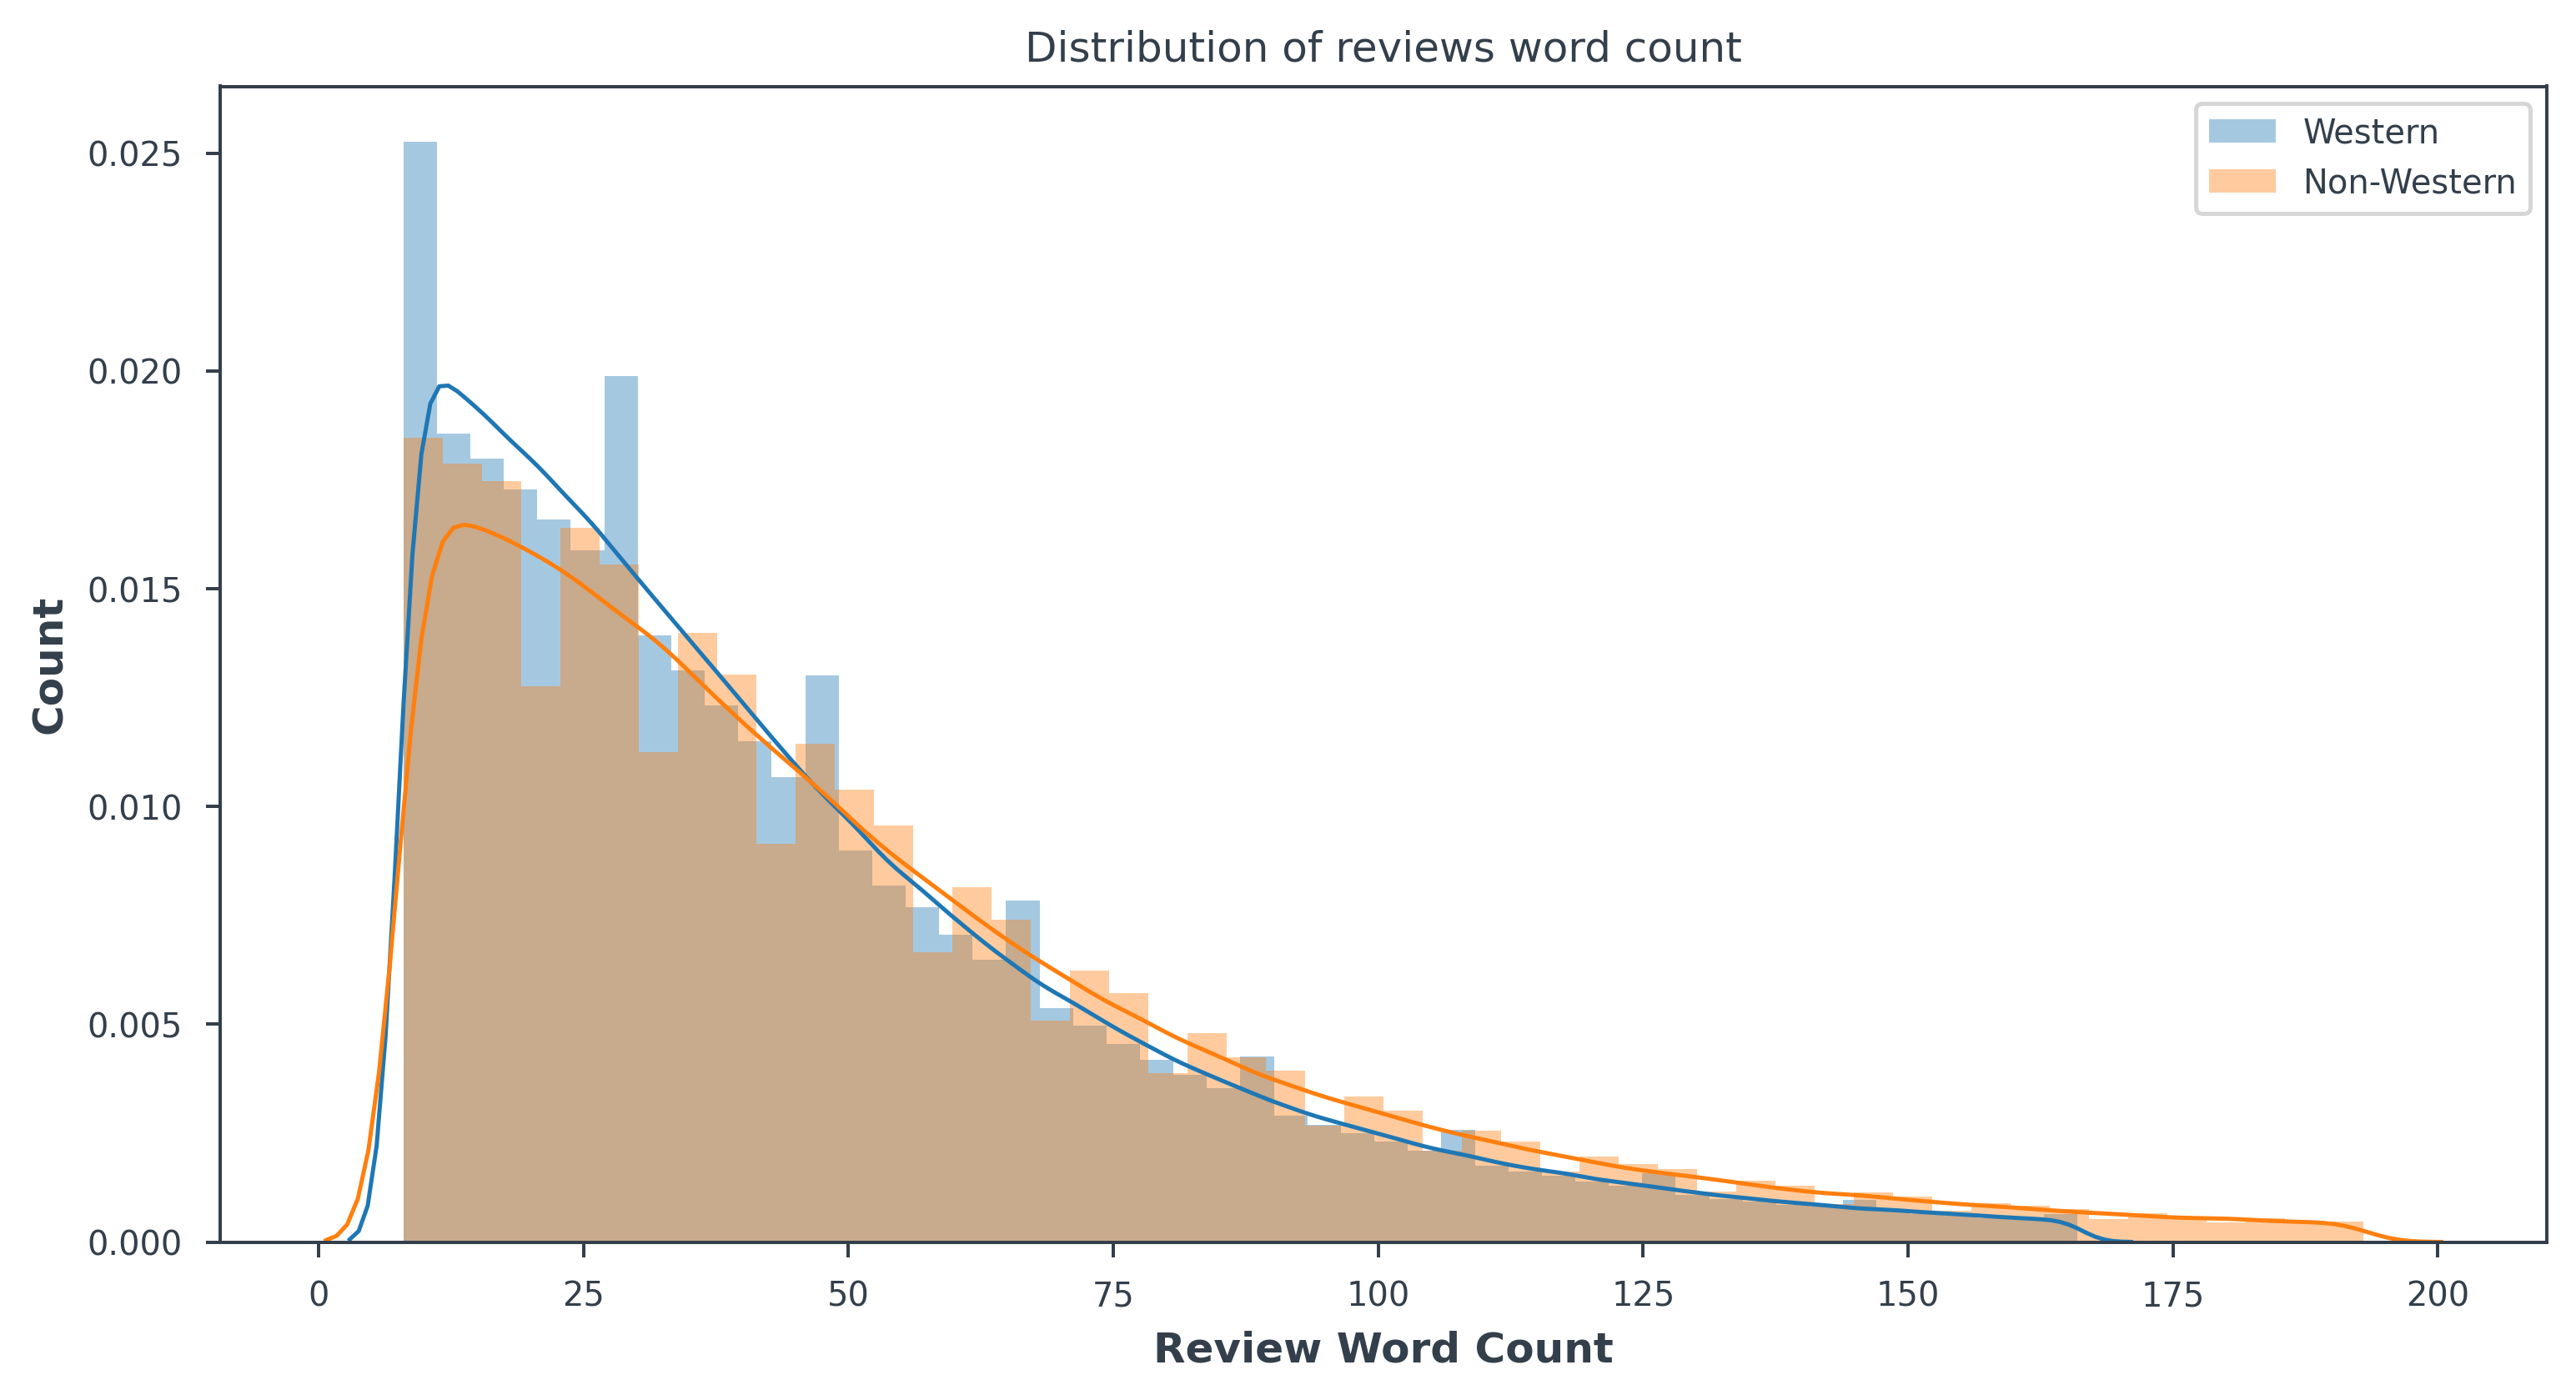

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data[data.type=='Western'].review_word_count, bins=50, ax=ax, label='Western')
sns.distplot(data[data.type=='Non-Western'].review_word_count, bins=50, ax=ax, label='Non-Western')

plt.title('Distribution of reviews word count')
plt.xlabel('Review Word Count')
plt.ylabel('Count')
plt.legend()

plt.show();

In [11]:
print('The average number of words in reviews is: {}'.format(round(data.review_word_count.mean())))
print('The minimum number of words in reviews is: {}'.format(min(data.review_word_count)))
print('The maximum number of words in reviews is: {}'.format(max(data.review_word_count)))

The average number of words in reviews is: 47
The minimum number of words in reviews is: 8
The maximum number of words in reviews is: 193


#### Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long' 

In [12]:
bins = [0, 20, 50, 193]
labels = ['Short', 'Medium', 'Long']
data['review_word_bined'] = pd.cut(data['review_word_count'], bins=bins, labels=labels)

In [13]:
data.review_word_bined[data.type=='Western'].value_counts()

Medium    1095560
Long       905072
Short      666727
Name: review_word_bined, dtype: int64

In [14]:
data.review_word_bined[data.type=='Non-Western'].value_counts()

Long      354087
Medium    344596
Short     191357
Name: review_word_bined, dtype: int64

#### Plot mean review word count by year

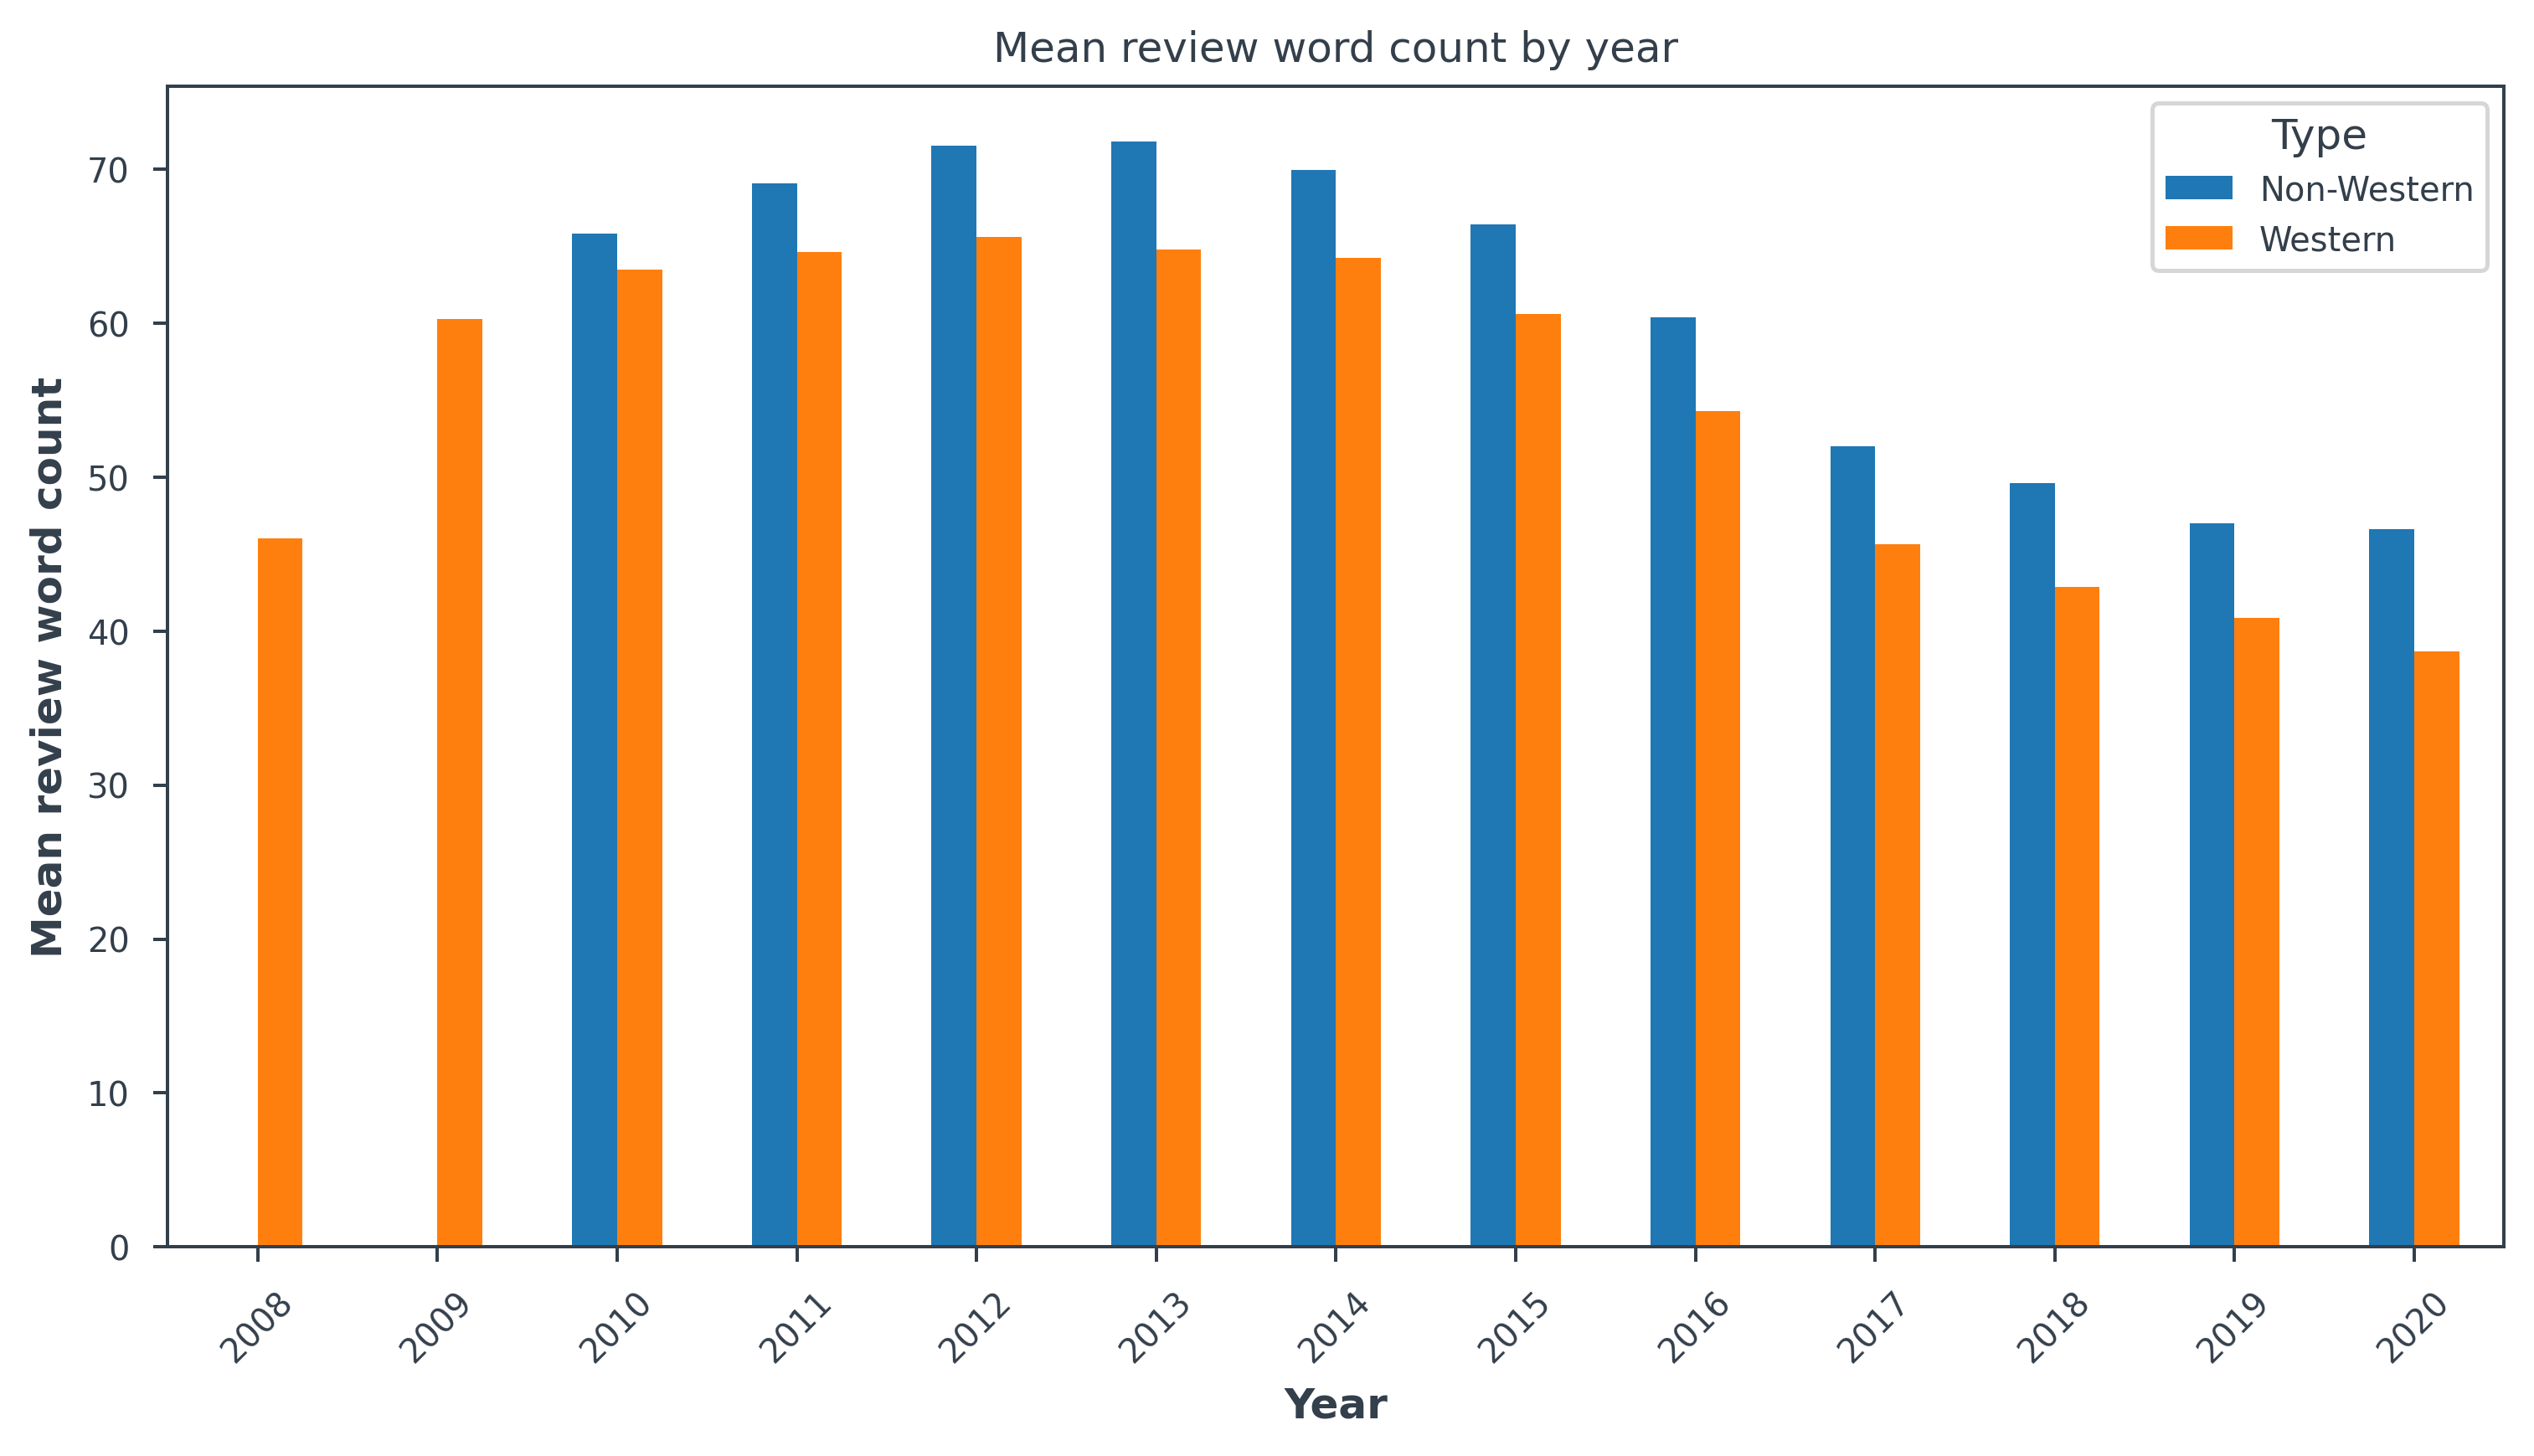

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['year', 'type'])['review_word_count'].mean().unstack().plot(kind='bar', ax=ax)
plt.title('Mean review word count by year')
plt.legend(title='Type')
plt.xlabel('Year')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review word count by city

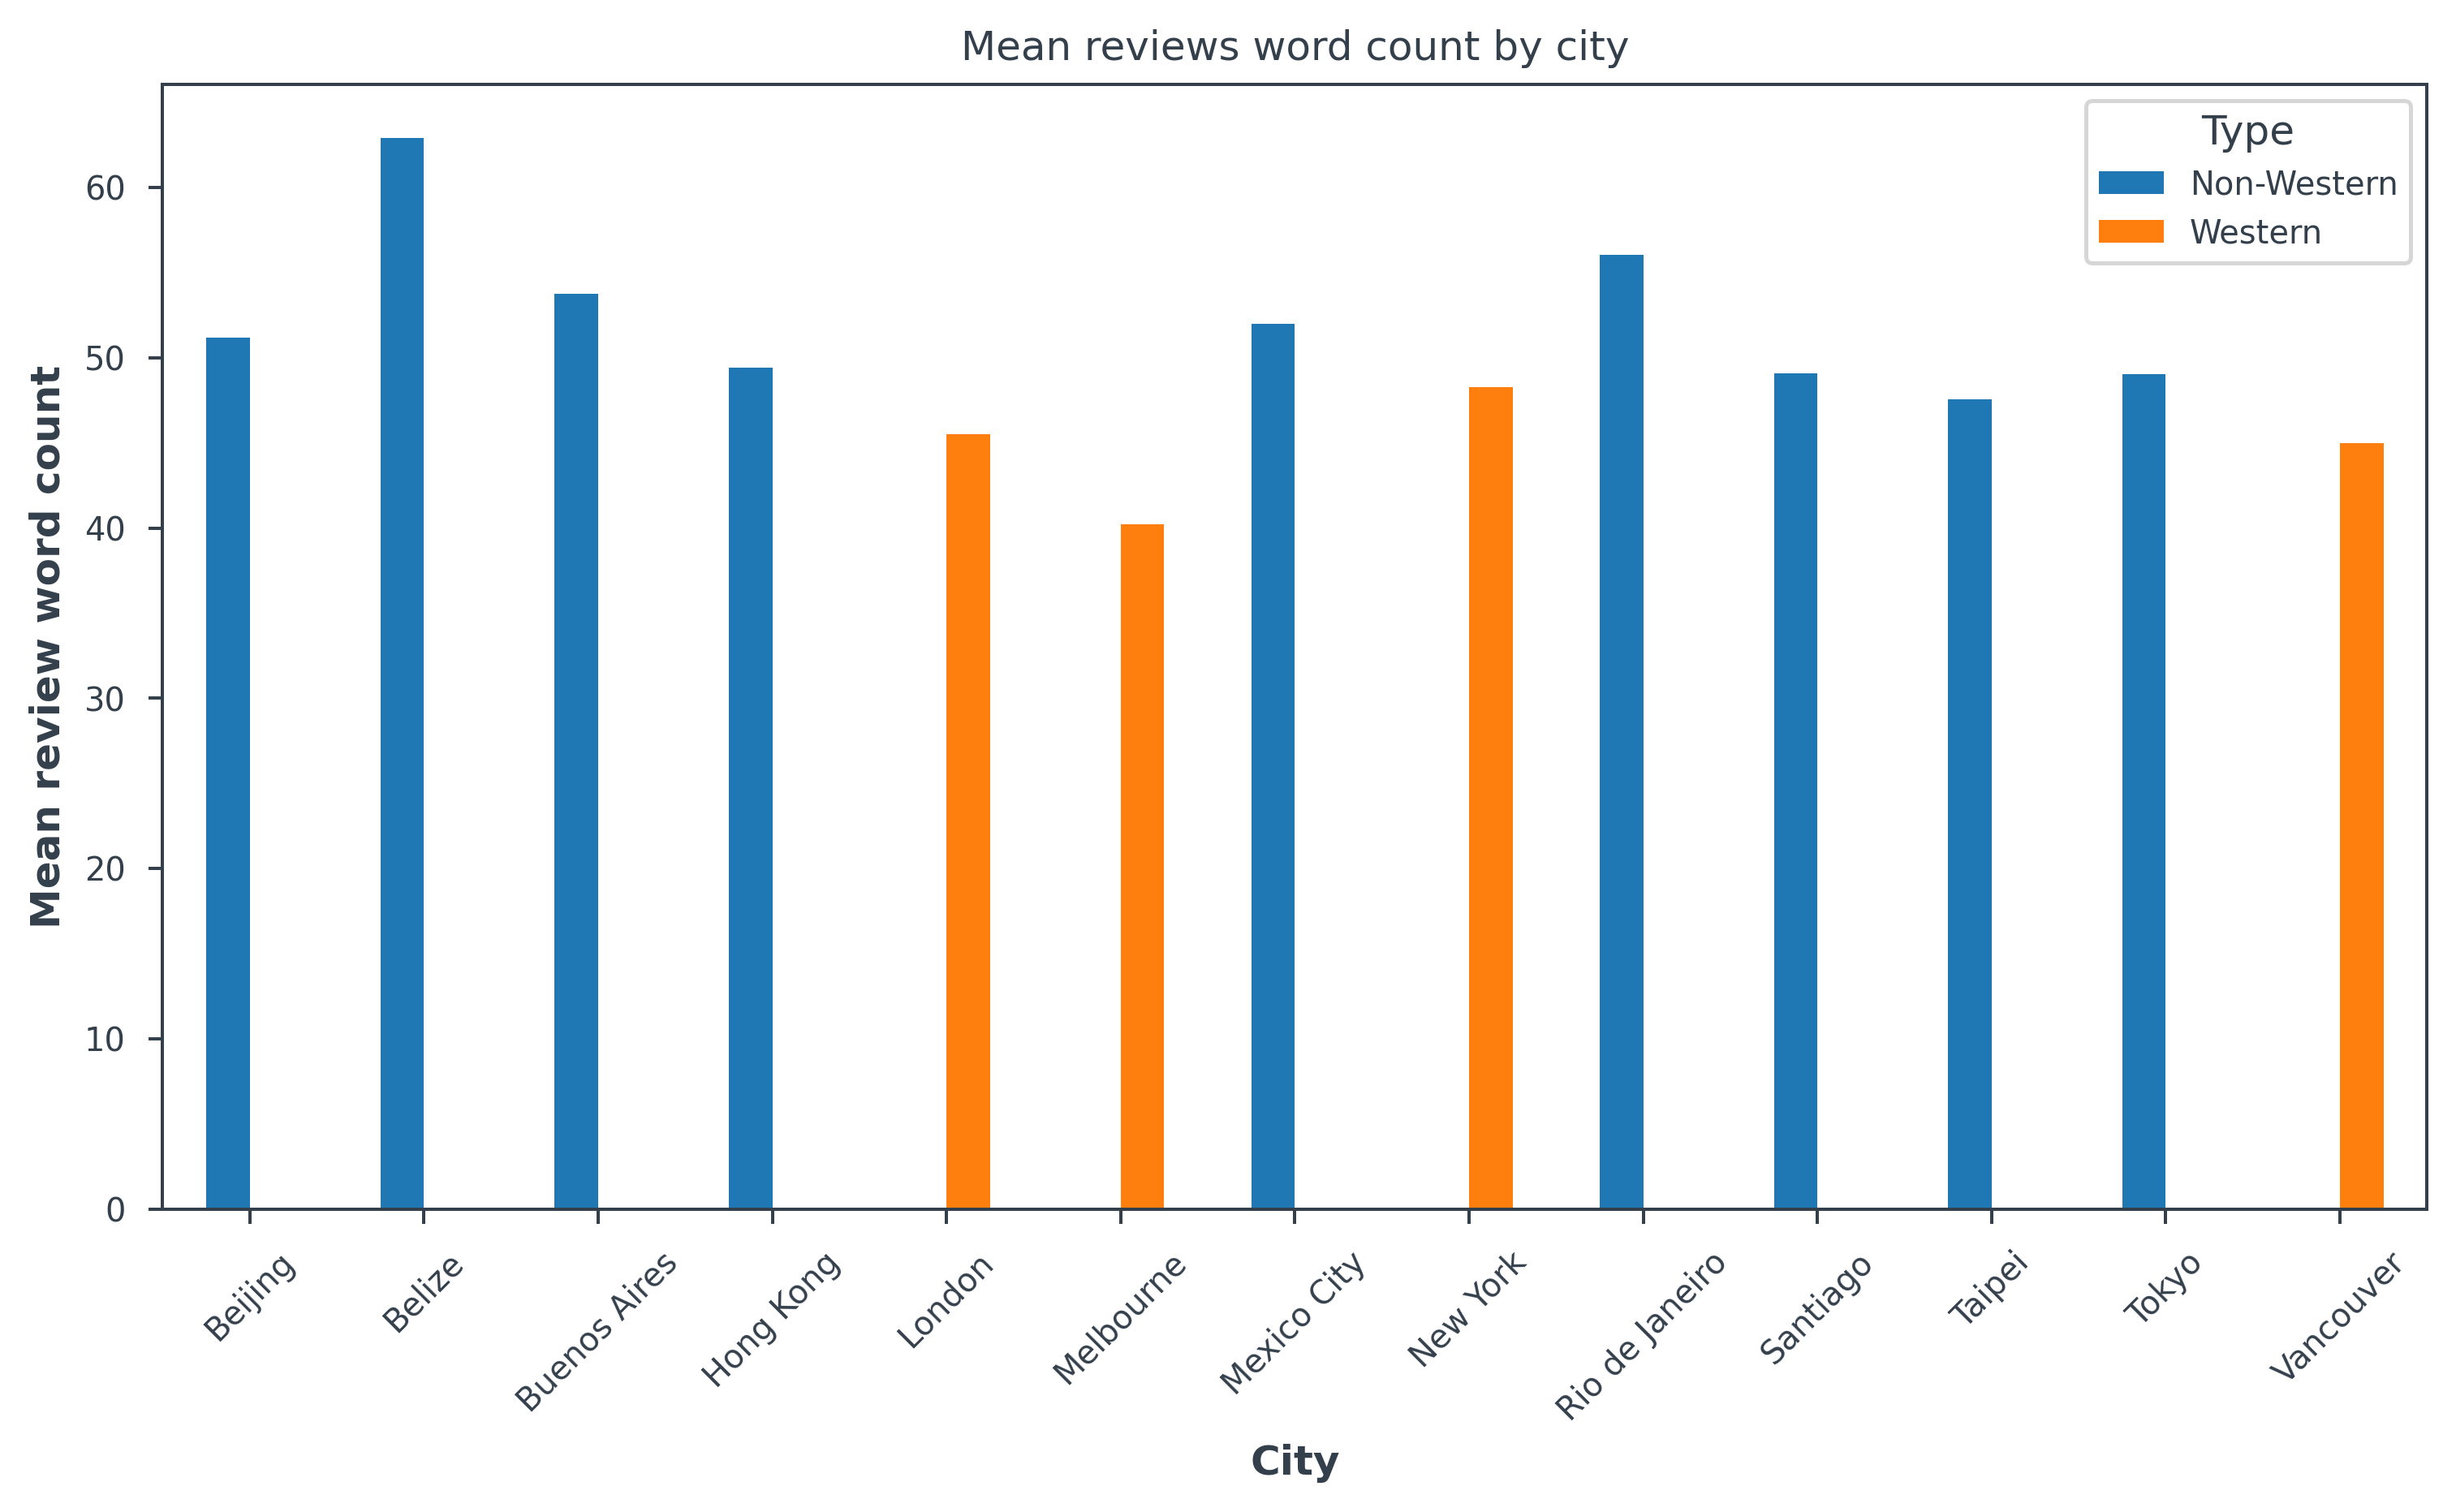

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'type'])['review_word_count'].mean().reset_index().pivot('city', 'type', 'review_word_count')\
            .plot(kind='bar', ax=ax,)
plt.title('Mean reviews word count by city')
plt.legend(title='Type')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review count by year and city

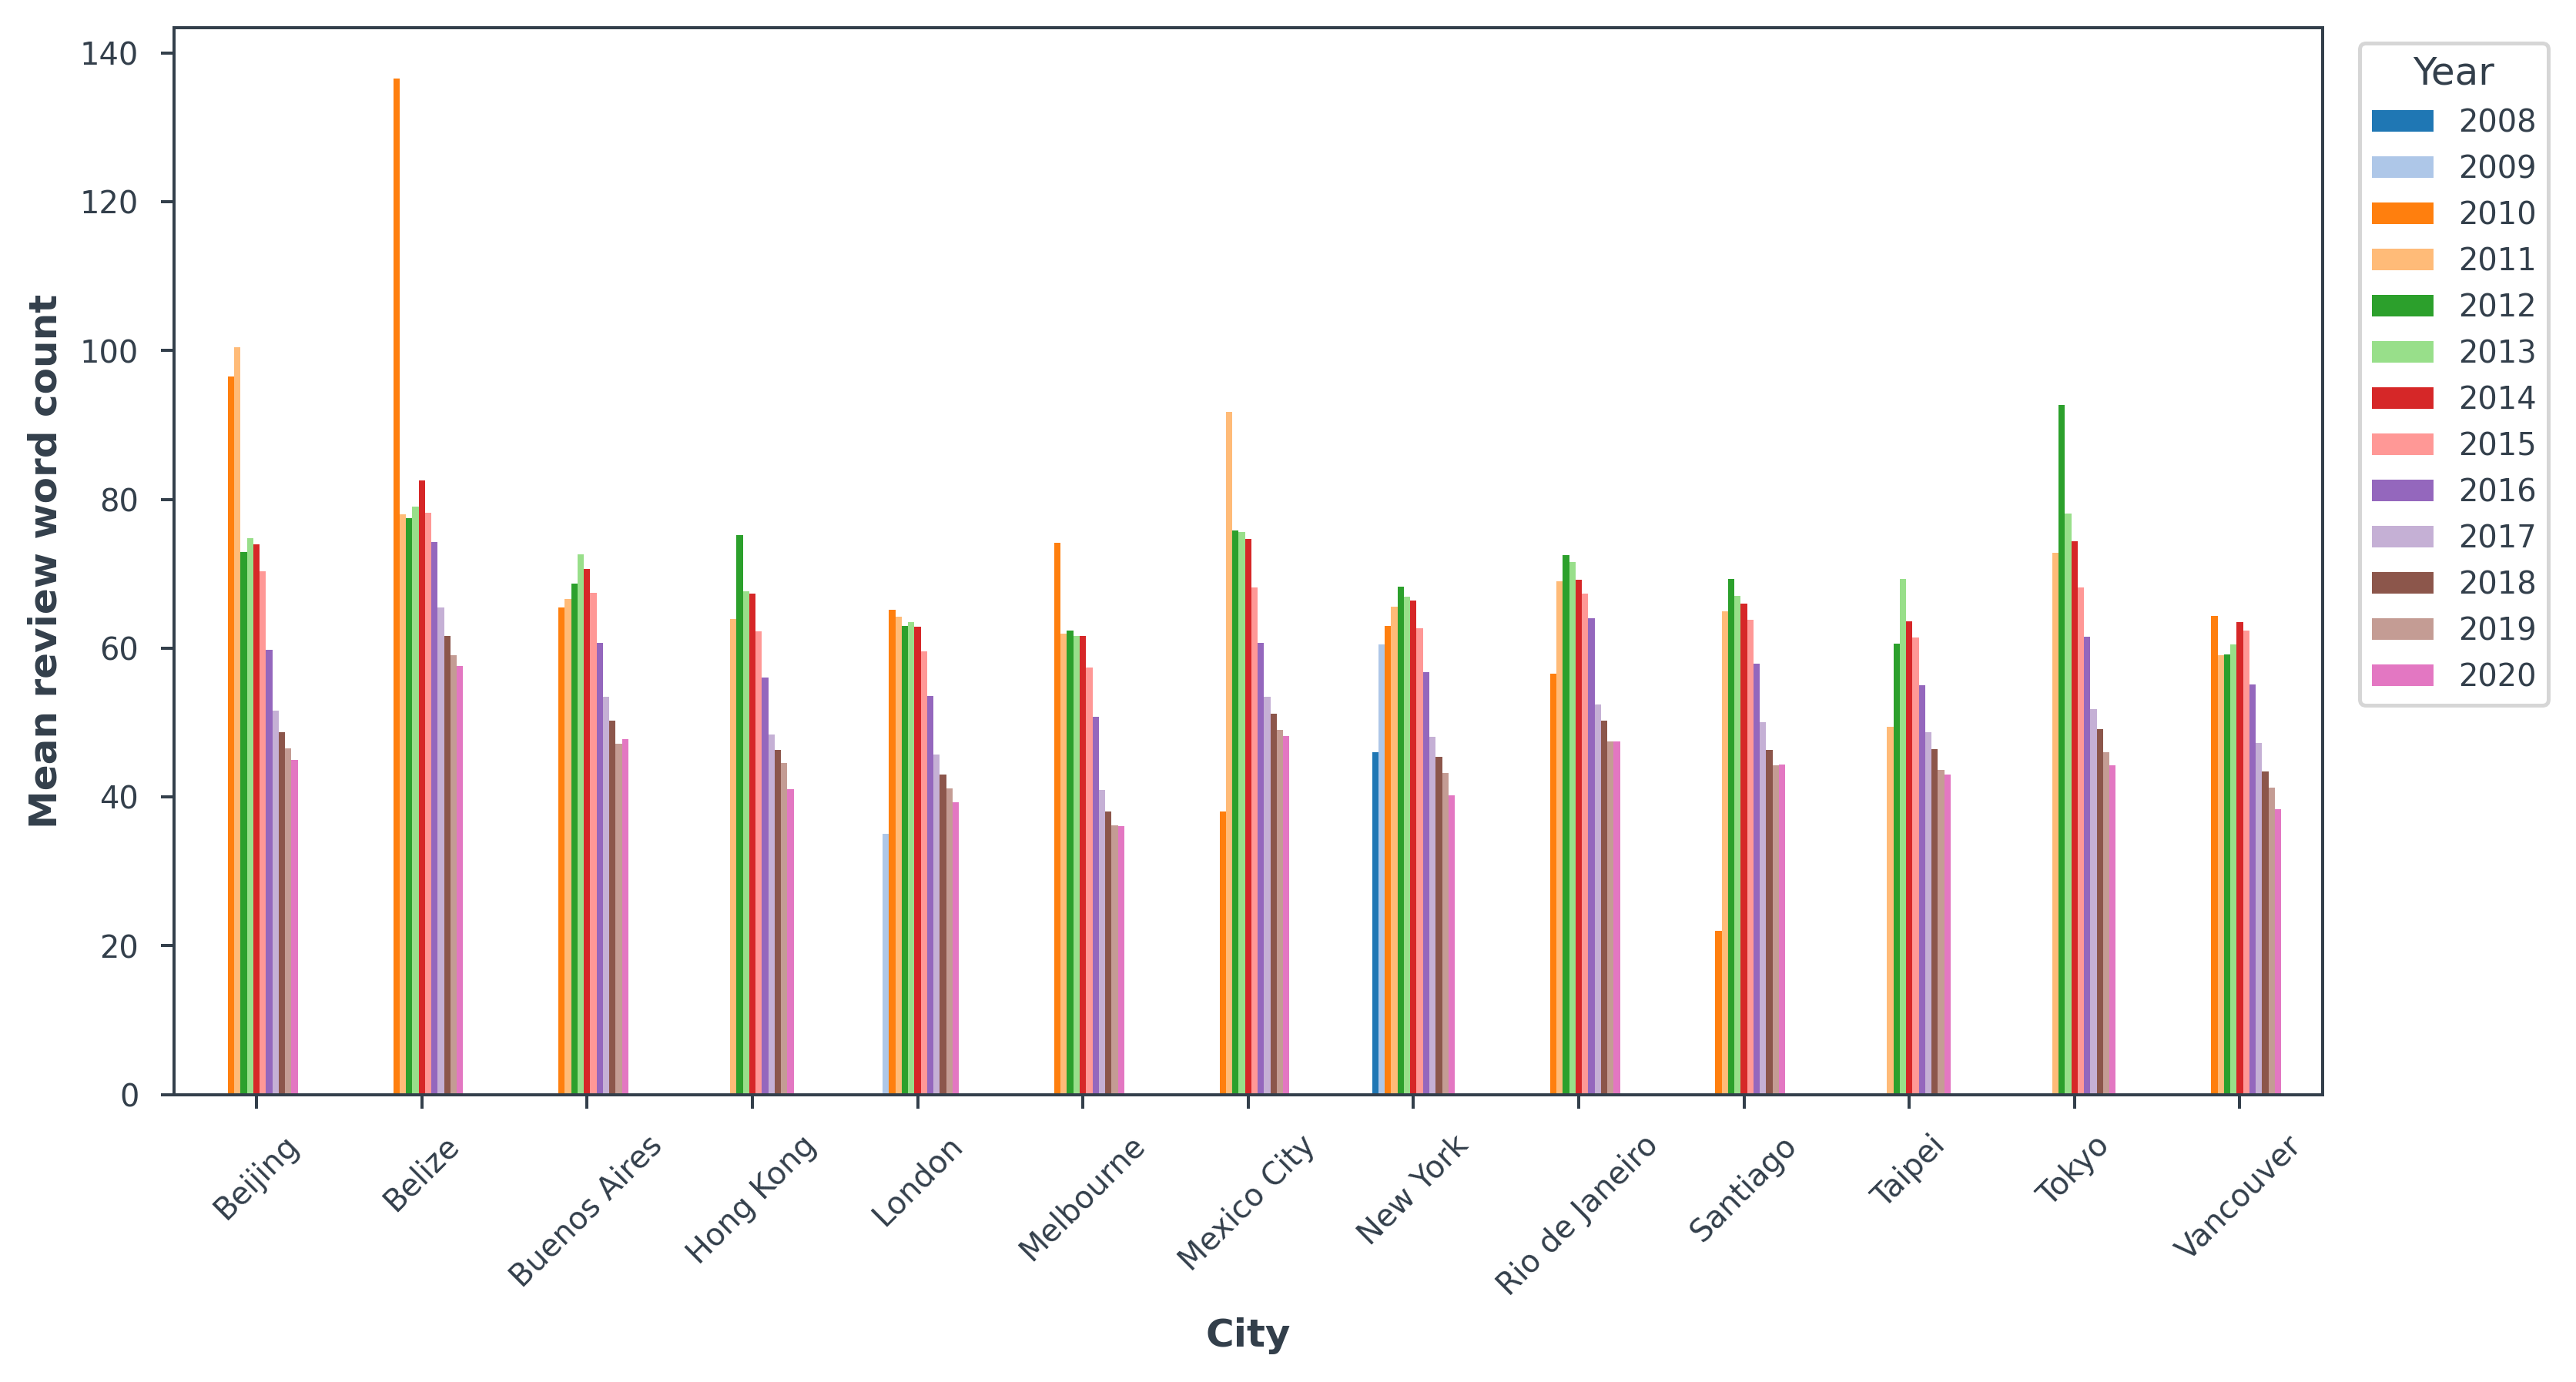

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'year'])['review_word_count'].mean().reset_index().pivot('city', 'year', 'review_word_count').plot(kind='bar', ax=ax, color=color)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Year')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

### Sample the data set

In [65]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [67]:
data_sample = stratified_sample_df(data, 'city', 1000)
print(data_sample.shape)
data_sample.head()

(13000, 26)


id        date  \
2681411  24241137  2018-08-02   
2682125  25394403  2019-05-19   
2686246  33284981  2019-12-04   
2681539  24442578  2019-05-21   
2674966  15093029  2019-08-05   

                                                  comments    host_id  \
2681411  Everything ok but the toilet. Even that, locat...   39756400   
2682125  Beautiful surrounding area. Very welcoming hos...  191704645   
2686246  The place is awesome, it is a very homey flat ...   10556918   
2681539  Everything as advertised though photos can be ...   21853968   
2674966  Room isn't massive but absolutely fine if you'...   93844429   

        neighbourhood_cleansed     city  latitude  longitude  \
2681411         朝阳区 / Chaoyang  Beijing  39.93326  116.45179   
2682125          怀柔区 / Huairou  Beijing  40.38493  116.54436   
2686246         朝阳区 / Chaoyang  Beijing  39.89959  116.46320   
2681539         朝阳区 / Chaoyang  Beijing  39.95889  116.43618   
2674966         朝阳区 / Chaoyang  Beijing  39.98260  116.41942   

         number_of_reviews first_review  ...  \
2681411                 46   2018-04-09  ...   
2682125                  1   2019-05-19  ...   
2686246                 57   2019-03-24  ...   
2681539                 29   2018-05-21  ...   
2674966                169   2016-09-21  ...   

                                         comments_expanded  \
2681411  Everything ok but the toilet. Even that, locat...   
2682125  Beautiful surrounding area. Very welcoming hos...   
2686246  The place is awesome, it is a very homey flat ...   
2681539  Everything as advertised though photos can be ...   
2674966  Room is not massive but absolutely fine if you...   

                                          comments_cleaned review_word_count  \
2681411  Everything ok but the toilet. Even that locati...                20   
2682125  Beautiful surrounding area. Very welcoming hos...                21   
2686246  The place is awesome it is a very homey flat l...               104   
2681539  Everything as advertised though photos can be ...                40   
2674966  Room is not massive but absolutely fine if you...                31   

         year  sentiment_from_rating sentiment_reviews  \
2681411  2018                    pos                 1   
2682125  2019                    pos                 1   
2686246  2019                    pos                 1   
2681539  2019                    pos                 0   
2674966  2019                    pos                 1   

        sentiment_reviews_textblob  \
2681411                          1   
2682125                          1   
2686246                          1   
2681539                          1   
2674966                          1   

                                     comments_to_sentences  \
2681411  [Everything ok but the toilet., Even that loca...   
2682125  [Beautiful surrounding area., Very welcoming h...   
2686246  [The place is awesome it is a very homey flat ...   
2681539  [Everything as advertised though photos can be...   
2674966  [Room is not massive but absolutely fine if yo...   

           sentiment_sentences         type  
2681411              [0, 0, 0]  Non-Western  
2682125                 [1, 1]  Non-Western  
2686246  [1, 1, 0, 1, 1, 0, 1]  Non-Western  
2681539                 [0, 1]  Non-Western  
2674966                 [0, 0]  Non-Western  

[5 rows x 26 columns]

In [12]:
with open('data_sample.pkl', 'wb') as f:
    pickle.dump(data_sample, f)

### Review preprocessing by sentences

#### Extract reviews

In [68]:
content = data_sample.comments_to_sentences.values.tolist()

In [69]:
pprint(content[:10])

[['Everything ok but the toilet.',
  'Even that location and bedrooms are good.',
  'And it is easy to check it etc'],
 ['Beautiful surrounding area.',
  'Very welcoming host and their own farm-to-table restaurant upstairs run by '
  'the host s parents very nice food'],
 ['The place is awesome it is a very homey flat looks much better than the '
  'pictures and description.',
  'The hospitality Lara extended was fantastic.',
  'Small touches that showed host really wanted her guests to feel at home and '
  'on vacation and everything was clean and cozy not your run-of-the-mill '
  'airbnb.',
  'minutes walking from tube stations which was perfect for us there are tube '
  'stations near home guomao n shuangjing Communication and check in and out '
  'was easy.',
  'Lara clearly takes pride in making it a special and comfortable stay for '
  'all.',
  'Highly recommend.',
  'It will beyond your expectation and give you a wonderful experiences'],
 ['Everything as advertised though photo

#### Plot most frequent words before preprocessing

In [124]:
def freq_words(content):
    all_words = [word for sentences in content for sentence in sentences for word in simple_preprocess(str(sentence), deacc=True)]
    freq_dist = FreqDist(all_words)
    return freq_dist

In [125]:
%%time
words_freq = freq_words(content)

CPU times: user 9min 15s, sys: 12.8 s, total: 9min 28s
Wall time: 9min 29s


In [54]:
def plot_freq_words(fdist, terms=20):
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns='count', n=terms) 
    
    plt.figure(figsize=(20,7))
    ax = sns.barplot(data=d, x='word', y='count')
    ax.set_ylabel('Count')
    ax.set_xlabel('Word')
    plt.title('Most frequent words before preprocessing')
    
    plt.show();

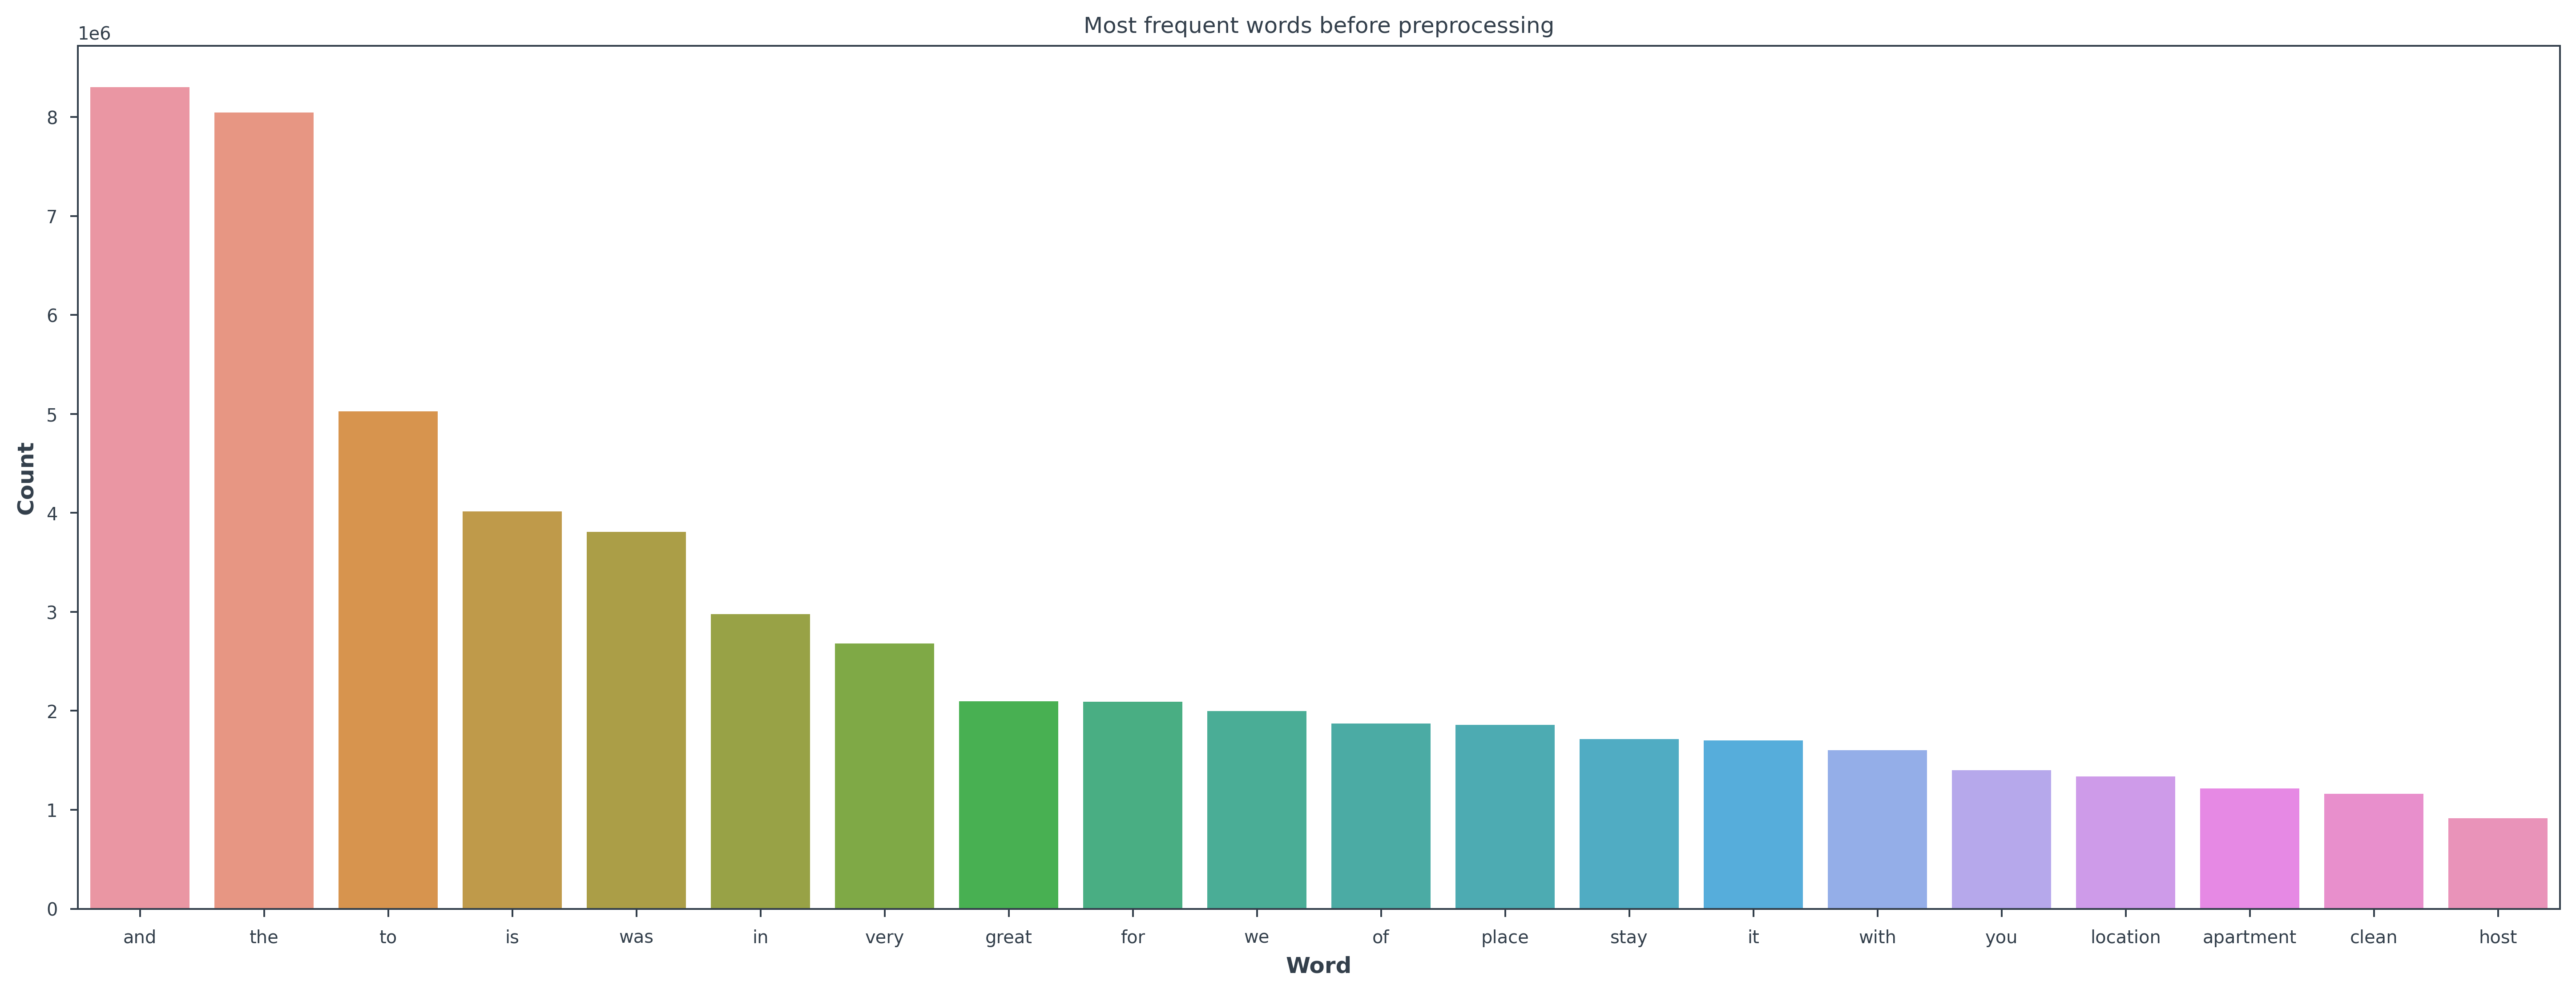

In [127]:
plot_freq_words(words_freq, 20)

#### Tokenize, lowercase and remove punctuation

In [70]:
def sentence_to_words(reviews):
    return [simple_preprocess(str(sentence), deacc=True) for review in reviews for sentence in review]

In [71]:
%%time
data_words = list(sentence_to_words(content))

CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.49 s


In [72]:
print(data_words[:10])

[['everything', 'ok', 'but', 'the', 'toilet'], ['even', 'that', 'location', 'and', 'bedrooms', 'are', 'good'], ['and', 'it', 'is', 'easy', 'to', 'check', 'it', 'etc'], ['beautiful', 'surrounding', 'area'], ['very', 'welcoming', 'host', 'and', 'their', 'own', 'farm', 'to', 'table', 'restaurant', 'upstairs', 'run', 'by', 'the', 'host', 'parents', 'very', 'nice', 'food'], ['the', 'place', 'is', 'awesome', 'it', 'is', 'very', 'homey', 'flat', 'looks', 'much', 'better', 'than', 'the', 'pictures', 'and', 'description'], ['the', 'hospitality', 'lara', 'extended', 'was', 'fantastic'], ['small', 'touches', 'that', 'showed', 'host', 'really', 'wanted', 'her', 'guests', 'to', 'feel', 'at', 'home', 'and', 'on', 'vacation', 'and', 'everything', 'was', 'clean', 'and', 'cozy', 'not', 'your', 'run', 'of', 'the', 'mill', 'airbnb'], ['minutes', 'walking', 'from', 'tube', 'stations', 'which', 'was', 'perfect', 'for', 'us', 'there', 'are', 'tube', 'stations', 'near', 'home', 'guomao', 'shuangjing', 'commu

In [17]:
from nltk.stem import PorterStemmer

In [19]:
def stemm(sentences):
    ps = PorterStemmer()
    return [ps.stem(word) for sentence in sentences for word in sentence]

In [20]:
%%time
data_stemm = list(stemm(data_words))

CPU times: user 45.1 s, sys: 253 ms, total: 45.3 s
Wall time: 45.3 s


In [21]:
print(data_stemm[:10])

['feng', 'place', 'wa', 'love', 'clean', 'spaciou', 'comfort', 'so', 'mani', 'pillow']


#### Create bigram and trigram models

In [86]:
%%time
#Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20)
trigram = gensim.models.Phrases(bigram[data_words])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.8 s


In [88]:
print(bigram_mod[data_words][0])
print(trigram_mod[data_words][0])

['the', 'host', 'was', 'very', 'friendly', 'and', 'accommodating']
['the', 'host', 'was', 'very', 'friendly', 'and', 'accommodating']


#### Remove stop words

In [14]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(sentence)) if word not in stop_words] for sentence in texts]

In [15]:
%%time
data_words_nostops = remove_stopwords(data_words)

CPU times: user 10.1 s, sys: 201 ms, total: 10.3 s
Wall time: 10.3 s


In [16]:
print(data_words_nostops[:10])

[['feng', 'place', 'lovely', 'clean', 'spacious', 'comfortable', 'many', 'pillows', 'blankets'], ['artistically', 'decorated'], ['apartment', 'provided', 'two', 'toilets', 'proved', 'huge', 'blessing', 'us', 'stayed', 'together'], ['apartment', 'location', 'also', 'conveniently', 'located', 'mere', 'minute', 'walk', 'train', 'station'], ['host', 'feng', 'helpful', 'easy', 'communicate', 'always', 'replied', 'within', 'hour'], ['requested', 'leave', 'luggage', 'apartment', 'post', 'checkout', 'flight', 'late', 'night', 'graciously', 'acceded', 'even', 'allowed', 'us', 'take', 'security', 'card', 'us', 'day', 'even', 'though', 'supposed', 'already', 'checked'], ['overall', 'great', 'stay', 'feng', 'place', 'would', 'recommend', 'anyone', 'visiting', 'beijing'], ['xiaoxi', 'unbelievably', 'fast', 'responding', 'anything', 'reach'], ['second', 'day', 'stay', 'found', 'washer', 'working', 'properly'], ['told', 'morning', 'afternoon', 'washer', 'replaced']]


#### Make bigrams and trigrams

In [92]:
def make_bigrams(texts):
    return [bigram_mod[sentence] for sentence in texts]

In [93]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[sentence]] for sentence in texts]

In [94]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams = make_trigrams(make_bigrams(data_words_nostops))
print(data_words_trigrams[:100])

[['host', 'friendly', 'accommodating'], ['communicates', 'well', 'speaks', 'great', 'english'], ['kind_enough', 'charge', 'extra', 'break', 'lock', 'left', 'keys', 'inside'], ['responsive', 'questions', 'concerns'], ['place', 'near', 'bus_station', 'minutes_away', 'via', 'taxi', 'forbidden_city', 'temple', 'heaven', 'neighboorhood', 'quiet', 'convenience_stores', 'local', 'affordable', 'restos'], ['toilet', 'clean', 'room', 'wide'], ['take', 'note', 'elevator'], ['overall', 'delightful', 'stay'], ['good', 'location', 'close', 'subway'], ['place', 'beautiful', 'host', 'communicated', 'operative', 'kind', 'way'], ['nice', 'restaurants', 'convenience_stores', 'close', 'apartment'], ['pleasant', 'experience', 'live', 'zhis', 'place'], ['mattress', 'comfortable', 'room', 'well_decorated'], ['environment', 'quiet', 'among', 'urban'], ['location', 'perfect'], ['convenient', 'hung', 'go', 'shopping'], ['awesome', 'experience'], ['twin', 'boys', 'enjoyed', 'much'], ['quite', 'good', 'renovation

#### Lemmatize

In [83]:
def lemmatization(nlp, sentences, allow_postages=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sentence in sentences:
        sentence = nlp(' '.join(sentence)) 
        texts_out.append([token.lemma_ for token in sentence if token.pos_ in allow_postages 
                          and token.lemma_ not in stop_words and len(token.lemma_) > 2])
    return texts_out

In [84]:
%%time
nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(nlp, data_words)

CPU times: user 2min 54s, sys: 8.48 ms, total: 2min 54s
Wall time: 2min 54s


In [85]:
print(data_lemmatized[:10])

[['toilet'], ['location', 'bedroom'], [], ['area'], ['host', 'farm', 'table', 'restaurant', 'host', 'parent', 'food'], ['place', 'homey', 'picture', 'description'], [], ['touch', 'host', 'guest', 'home', 'vacation', 'run', 'mill'], ['minute', 'tube', 'station', 'tube', 'station', 'home', 'guomao', 'communication'], ['pride', 'stay']]


In [25]:
import nltk 
from nltk.corpus import wordnet 

In [121]:

import nltk 
from nltk.corpus import wordnet 
nltk.download('wordnet')
synonyms = []

print(wordnet.synset("good.n.01").lemmas())

word = "host"

for syn in wordnet.synsets(word): 
    for l in syn.lemmas(): 
        print(l)
        if l.synset().name().split('.')[2] == '01':
            synonyms.append(l.name())
        for le in l.synset().lemmas(): 
            if le.name == word or le.synset().name().split('.')[0] == word:
                synonyms.append(le.name())
                synonyms.append(le.synset().name().split('.')[0])

print(set(synonyms))

[Lemma('good.n.01.good')]
Lemma('host.n.01.host')
Lemma('horde.n.01.horde')
Lemma('horde.n.01.host')
Lemma('horde.n.01.legion')
Lemma('host.n.03.host')
Lemma('master_of_ceremonies.n.01.master_of_ceremonies')
Lemma('master_of_ceremonies.n.01.emcee')
Lemma('master_of_ceremonies.n.01.host')
Lemma('host.n.05.host')
Lemma('host.n.05.legion')
Lemma('host.n.06.host')
Lemma('host.n.07.host')
Lemma('host.n.08.host')
Lemma('host.n.08.innkeeper')
Lemma('host.n.08.boniface')
Lemma('host.n.09.Host')
Lemma('server.n.03.server')
Lemma('server.n.03.host')
Lemma('host.v.01.host')
{'horde', 'host', 'Host', 'emcee', 'master_of_ceremonies', 'boniface', 'legion', 'innkeeper'}


[nltk_data] Downloading package wordnet to /home/natalia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
w1 = wordnet.synset('subway') 
w2 = wordnet.synset('metro')

w1.wup_similarity(w2)

ValueError: not enough values to unpack (expected 3, got 1)

In [19]:
all_words = set([word for sentence in data_lemmatized for word in sentence])
len(all_words)

452

In [76]:
import operator
all_words = set([word for sentence in data_lemmatized for word in sentence])

dictionary = {}

for word in all_words:
    sim = {word: 1}
    for w in all_words:
        if word != w:
            try:
                w1 = wordnet.synset(word + '.n.01') 
                w2 = wordnet.synset(w + '.n.01') 
                score = w1.wup_similarity(w2)
                if score > 0.75:
                    sim[w] = score
            except:
                a = 0
    
    dictionary[word] = [key for key, value in list(sorted(sim.items(), key=operator.itemgetter(1), reverse=True))[:5]]

In [40]:
for key, value in dictionary.items():
    if len(value) > 1:
        print(key, value)

right ['right', 'access', 'complex']
couple ['couple', 'community']
comfort ['comfort', 'convenience', 'condition', 'need', 'problem']
slip ['slip', 'mistake']
walk ['walk', 'walking', 'travel', 'trip', 'ride']
bird ['bird', 'rooster', 'dog']
comment ['comment', 'answer', 'description']
level ['level', 'style', 'way']
shampoo ['shampoo', 'soap', 'water', 'lime']
friend ['friend', 'person']
arrival ['arrival', 'advent']
advent ['advent', 'arrival']
food ['food', 'meal', 'chocolate', 'juice', 'tea']
grocery ['grocery', 'supermarket', 'store', 'shop']
area ['area', 'middle', 'corner', 'scene', 'center']
picture ['picture', 'photo', 'scenery', 'art']
sugarloaf ['sugarloaf', 'coconut']
business ['business', 'subway', 'metro']
meal ['meal', 'breakfast', 'food']
sunset ['sunset', 'sunrise']
community ['community', 'couple']
bag ['bag', 'box', 'dish', 'bin', 'bath']
work ['work', 'service', 'care', 'activity', 'job']
airport ['airport', 'facility', 'transportation', 'station']
express ['expres

In [46]:
data_lemmatized

[['room'],
 ['host'],
 ['room', 'picture', 'toilet'],
 ['apartment', 'elevator', 'floor'],
 ['palace', 'minute'],
 ['light',
  'apartment',
  'home',
  'studio',
  'style',
  'furniture',
  'detail',
  'perspective',
  'space'],
 ['living', 'concise', 'rest'],
 [],
 ['cheer'],
 [],
 [],
 ['location', 'host'],
 [],
 ['youth', 'space', 'hostel', 'community', 'skill'],
 ['staff'],
 ['stay'],
 ['case', 'student', 'university', 'landlord', 'option', 'appartment', 'area'],
 ['location', 'station'],
 ['host'],
 ['apartment'],
 ['host'],
 ['environment', 'hutong'],
 ['neighborhood'],
 [],
 ['place', 'day'],
 ['hostess'],
 [],
 ['communication', 'rudy'],
 ['night', 'airport', 'time'],
 ['bungalow'],
 [],
 ['orange', 'lime', 'orchard', 'tilapia', 'thank', 'scenery', 'wildlife'],
 ['introduction', 'tip'],
 ['place'],
 ['vacation', 'flight', 'day'],
 ['place', 'minute'],
 [],
 ['tip', 'place'],
 [],
 ['place', 'area'],
 ['place', 'heart'],
 [],
 [],
 ['person', 'check'],
 ['hospitality', 'mother',

In [77]:
data_lemmatized1 = [list(set([w for word in sentence for w in dictionary[word]])) for sentence in data_lemmatized]

In [56]:
#with open('data_lemmatized_all.pkl', 'wb') as f:
    pickle.dump(data_lemmatized, f)

IndentationError: unexpected indent (<ipython-input-56-c9482ecb8501>, line 2)

In [50]:
with open('token1.pkl', 'wb') as f:
    pickle.dump(data_lemmatized1, f)

#### Plot most frequent words after preprocessing

In [78]:
words_freq = dict()
for doc in data_lemmatized1:
    for word in doc:
        if word in words_freq:
            words_freq[word] = words_freq[word] + 1
        else:
            words_freq[word] = 1

In [220]:
len(sorted(words_freq.items(), key=operator.itemgetter(1)))

3504

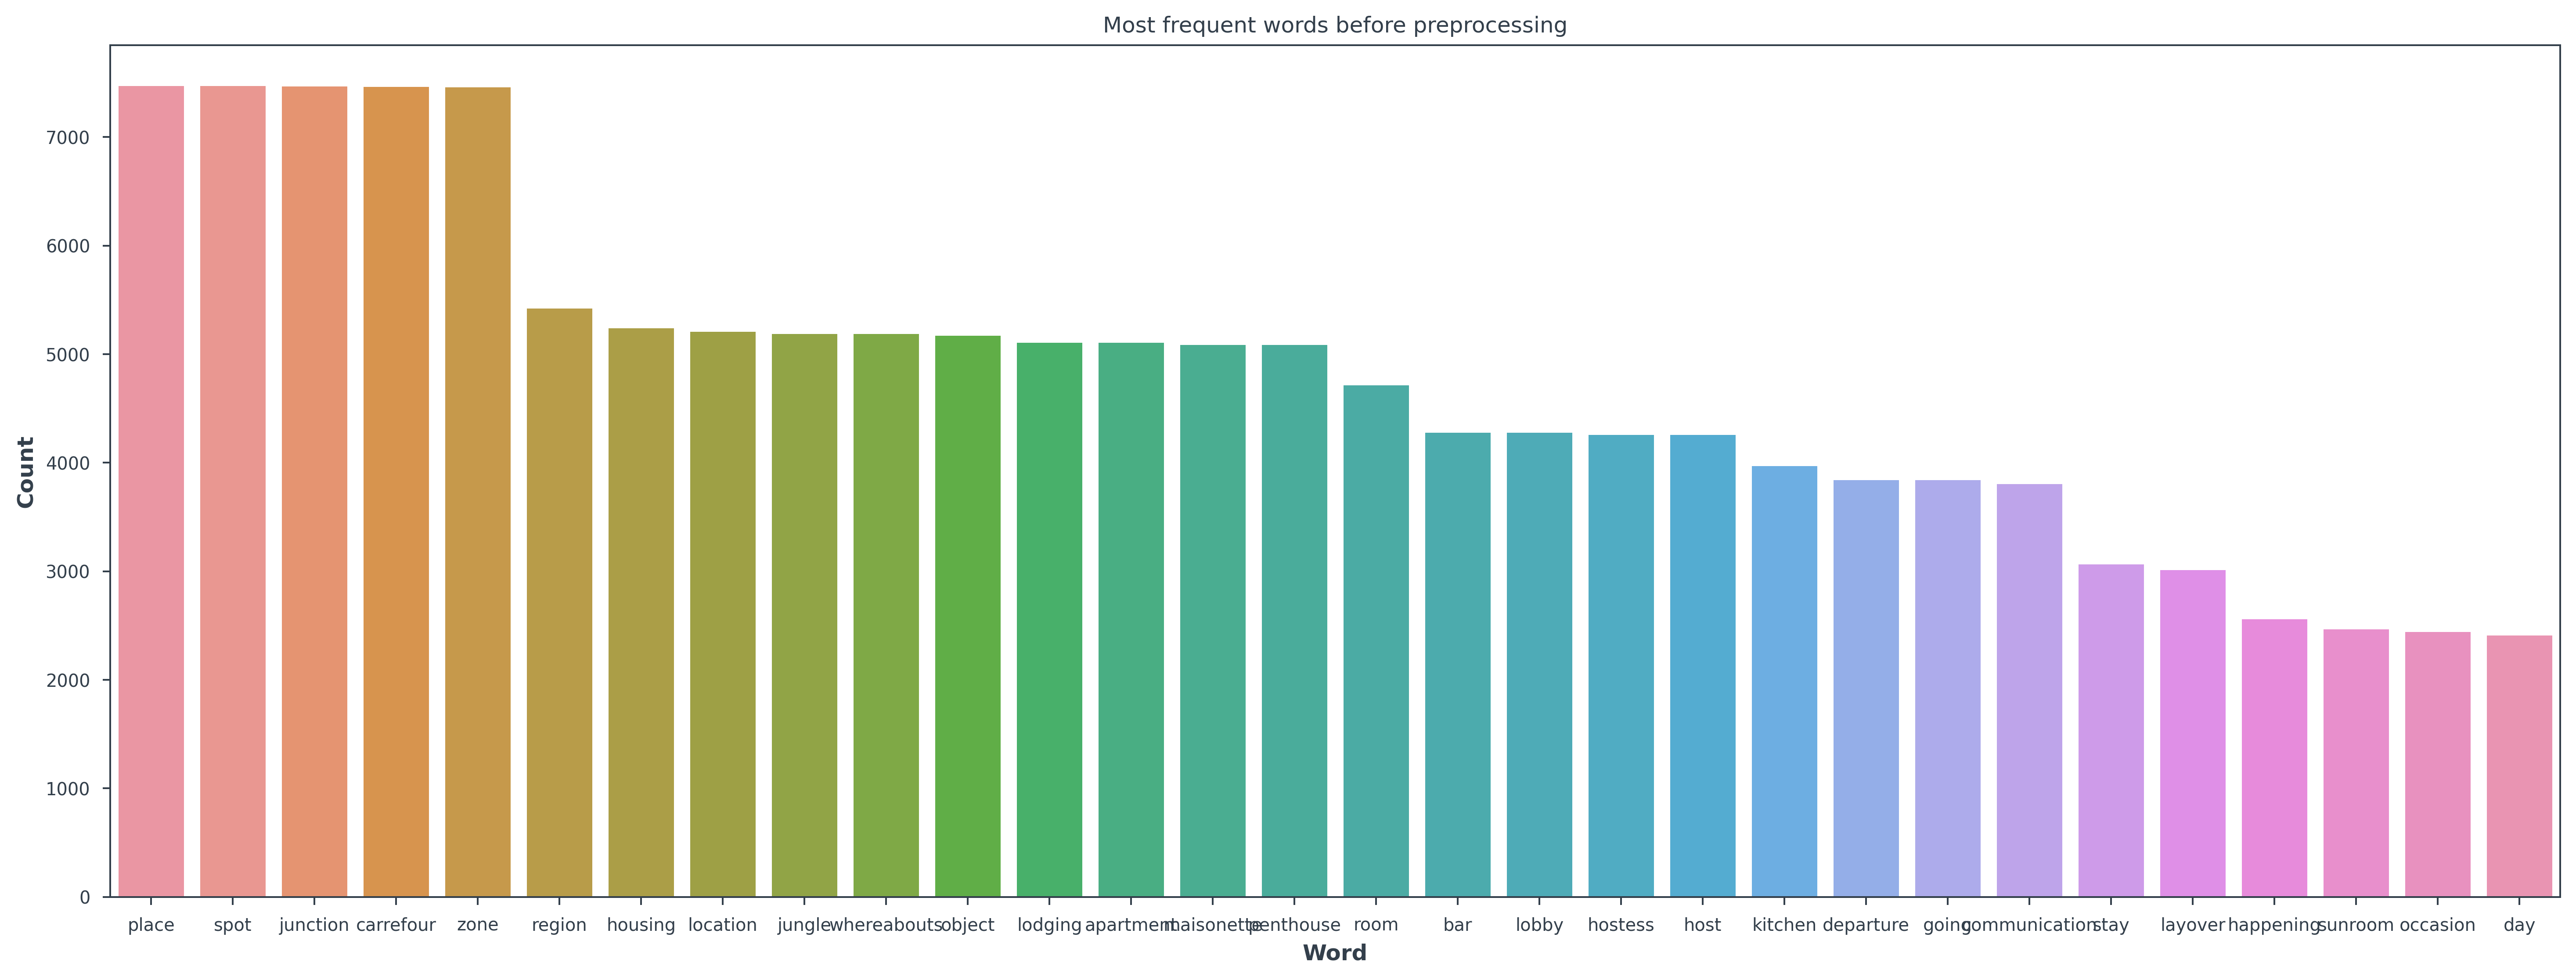

In [79]:
plot_freq_words(words_freq, 30)

In [86]:
less_frequent_words = set([word for word, v in words_freq.items() if v < 2])
def remove_freqwords(text):
    return [word for sentence in text for word in sentence.split() if word not in less_frequent_words]

new_data_lemmatized = [remove_freqwords(review) for review in data_lemmatized]

In [59]:
less_frequent_words

{'abit',
 'accommodation',
 'ada',
 'addition',
 'amnenditie',
 'amount',
 'antonio',
 'apartement',
 'apt',
 'arlette',
 'ars',
 'artwork',
 'avail',
 'belize',
 'berwick',
 'bite',
 'botafogo',
 'bug',
 'bunch',
 'burger',
 'buzzing',
 'cart',
 'casita',
 'cbd',
 'cdmx',
 'cheer',
 'choice',
 'cinema',
 'close',
 'comfy',
 'company',
 'concise',
 'course',
 'cozyness',
 'crime',
 'culture',
 'cvs',
 'deal',
 'designer',
 'dining',
 'direction',
 'downtown',
 'effort',
 'elaine',
 'electronic',
 'enough',
 'enquirer',
 'essential',
 'exactyle',
 'excellent',
 'fernando',
 'future',
 'gallagher',
 'garifuna',
 'golf',
 'guest',
 'gun',
 'half',
 'hassle',
 'heating',
 'hector',
 'hope',
 'hopkin',
 'hsbc',
 'hub',
 'hutong',
 'inconvenience',
 'inquiry',
 'invasion',
 'island',
 'joint',
 'junior',
 'kayo',
 'landlord',
 'landrymat',
 'laura',
 'lift',
 'light',
 'mattress',
 'neighourhood',
 'netflix',
 'one',
 'order',
 'personal',
 'pharmacy',
 'plantation',
 'point',
 'possibilty',

In [61]:
most_frequent_words = set([word for word, v in sorted(words_freq.items(), key=operator.itemgetter(1), reverse=True)[:10]])
most_frequent_words

{'activity',
 'area',
 'building',
 'house',
 'location',
 'outside',
 'place',
 'porch',
 'side',
 'spot'}

In [87]:
most_frequent_words = set([word for word, v in sorted(words_freq.items(), key=operator.itemgetter(1), reverse=True)[:10]])
def remove_most_freqwords(text):
    return [word for sentence in text for word in sentence.split() if word not in most_frequent_words]

new_data_lemmatized = [remove_most_freqwords(review) for review in new_data_lemmatized]

In [235]:
new_data_lemmatize = [x for x in new_data_lemmatize if x != []]
new_data_lemmatize

[['communicate', 'speak'],
 ['charge', 'break', 'lock', 'leave', 'key'],
 ['question', 'concern'],
 ['bus',
  'station',
  'minute',
  'taxi',
  'city',
  'neighboorhood',
  'convenience',
  'store',
  'resto'],
 ['toilet'],
 ['take', 'note', 'elevator'],
 ['subway'],
 ['communicate', 'way'],
 ['restaurant', 'convenience', 'store'],
 ['experience', 'live', 'zhis'],
 ['mattress', 'decorate'],
 ['environment', 'urban'],
 ['hang', 'go', 'shopping'],
 ['experience'],
 ['boy', 'enjoy'],
 ['renovation', 'style', 'lane', 'meter', 'coffee', 'shop'],
 ['day', 'get', 'loyalty', 'card', 'coffee'],
 ['level', 'manage', 'stair', 'handrail'],
 ['bed', 'floor', 'manage', 'bang', 'head', 'beam', 'stand'],
 ['put', 'stuff'],
 ['code',
  'work',
  'see',
  'number',
  'sun',
  'shine',
  'learn',
  'number',
  'don',
  'get',
  'lock',
  'people',
  'compound'],
 ['attraction'],
 ['contribute', 'time'],
 ['thank'],
 ['bring', 'water'],
 ['area'],
 ['center'],
 ['experience'],
 ['select', 'accommodation'

In [88]:
with open('token.pkl', 'wb') as f:
    pickle.dump(new_data_lemmatized, f)

#### Plot wordcloud of most frequent words

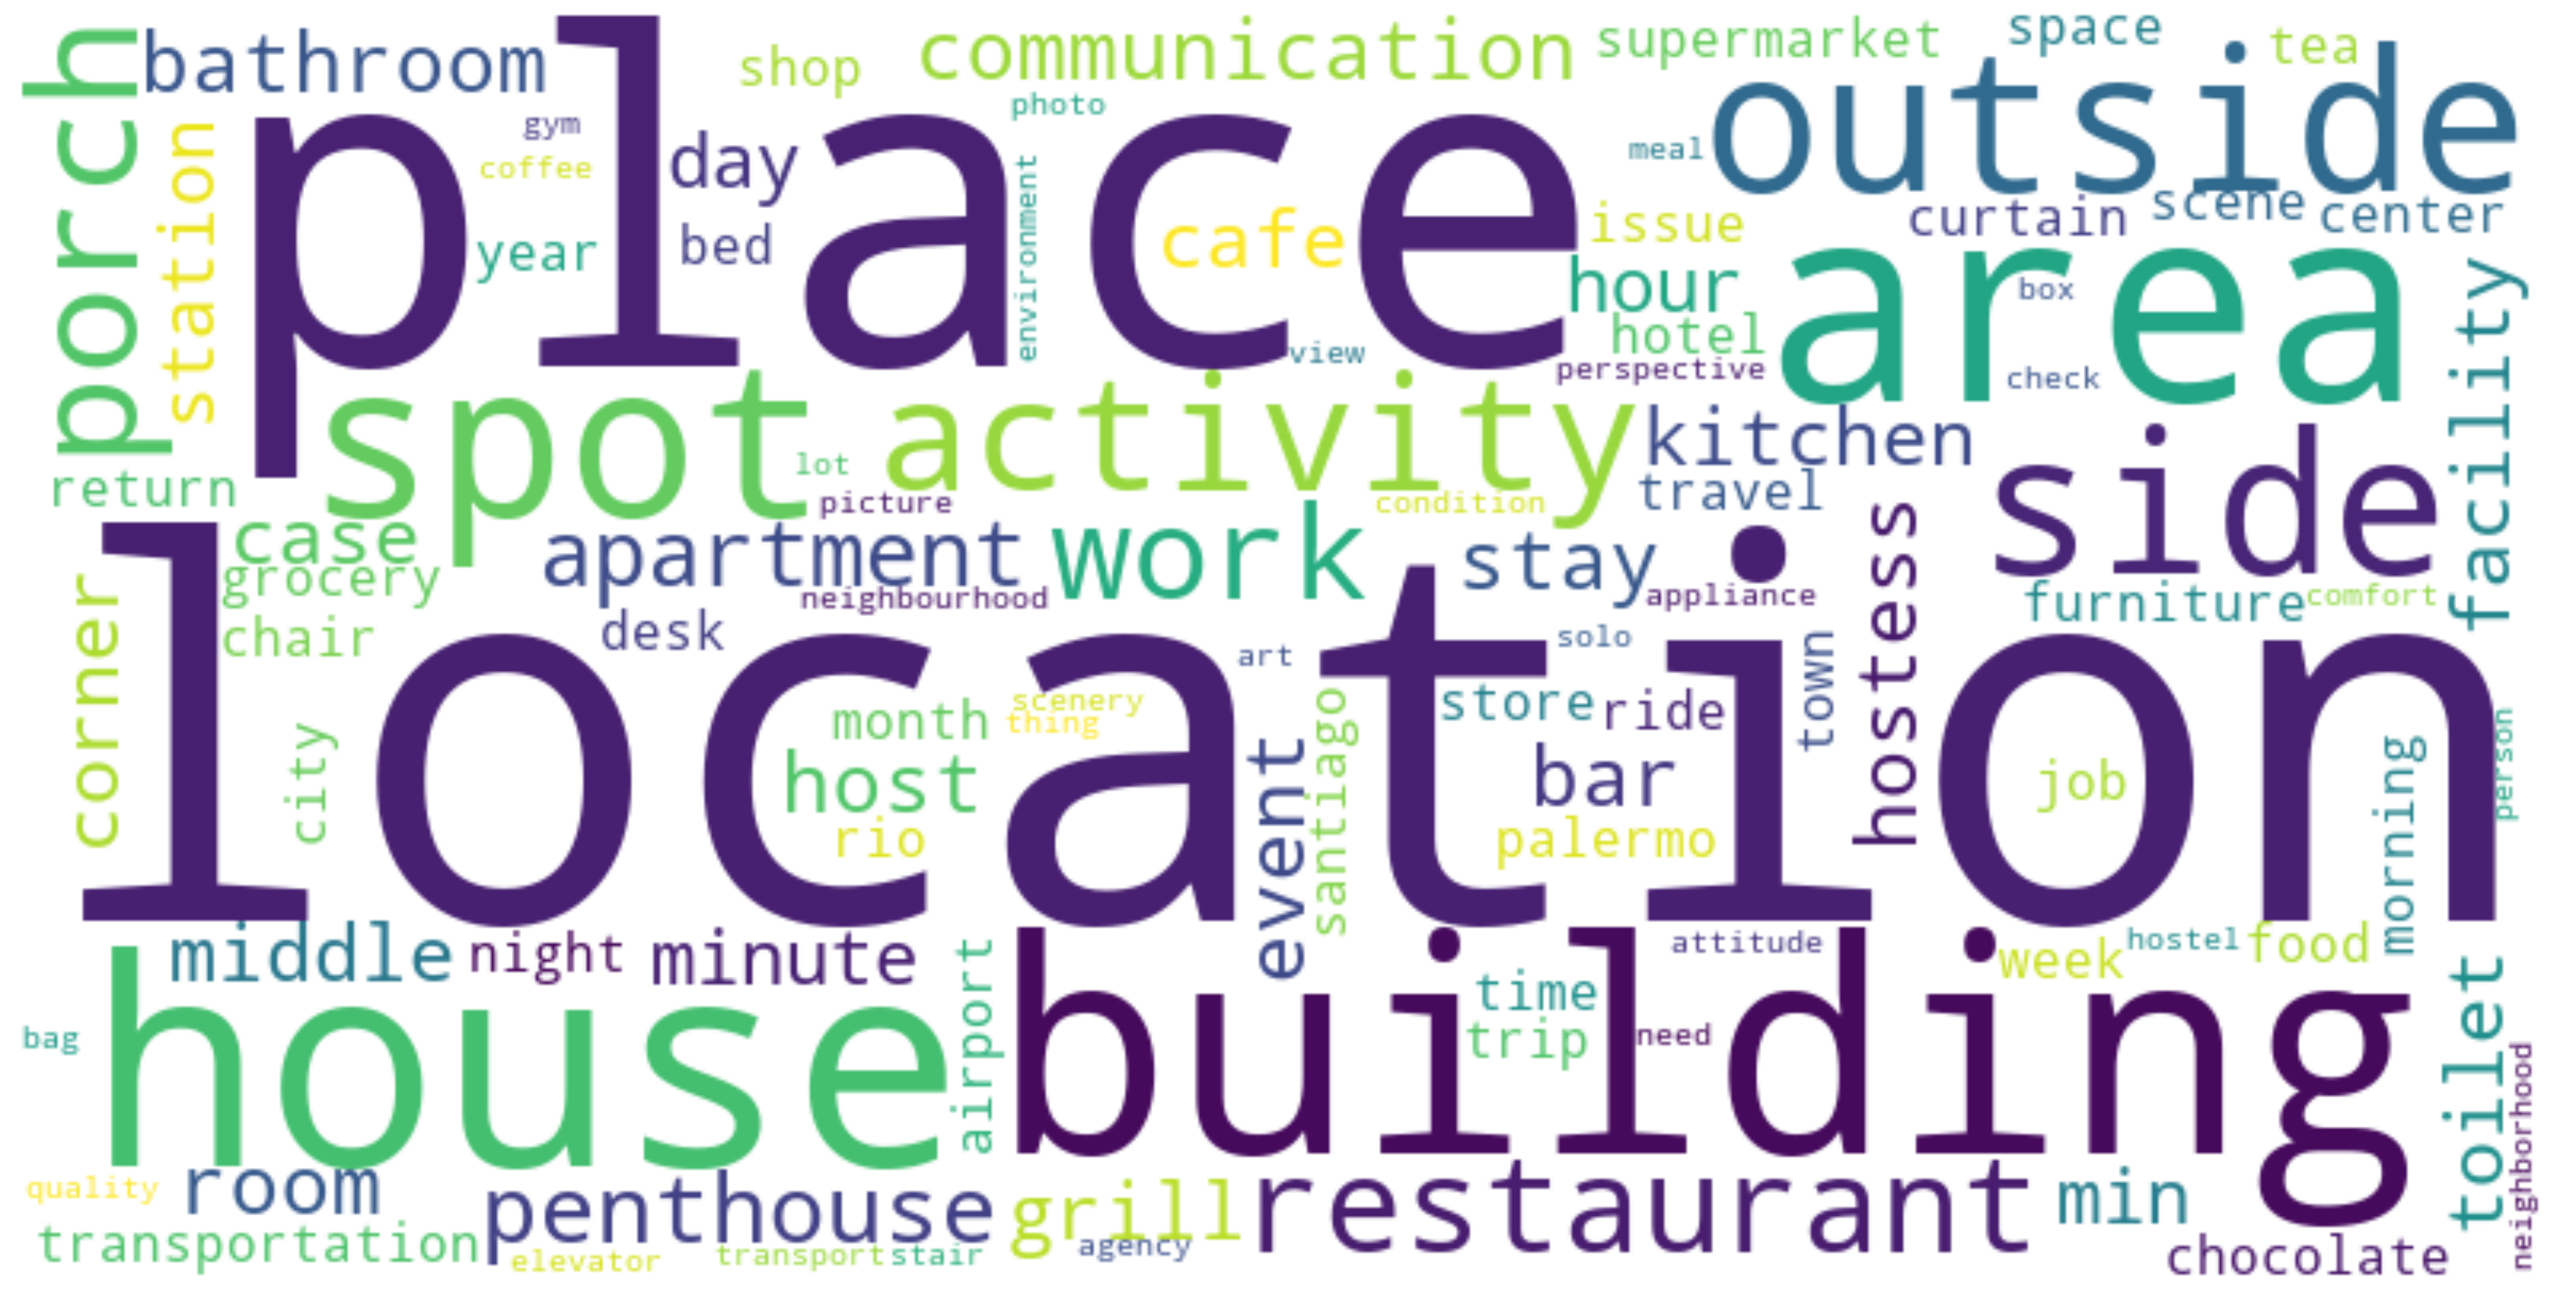

In [56]:
from wordcloud import WordCloud, ImageColorGenerator
    
wordcloud = WordCloud(background_color='white', width=800, height=400,
                      max_words=100,
                      random_state=42).generate_from_frequencies(words_freq)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.tight_layout(pad=0)
plt.show();